<a href="https://colab.research.google.com/github/rehgend/EksplorasiHyperparameterCNN_NN/blob/main/Tugas%201B%20-%20Regresi%20Boston%20Housing%20Price%20dengan%20ANN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **<center>Tugas 1B - Regresi Boston Housing Price dengan ANN**
### **<center>Rahman Indra Kesuma - 33221026**
<br><br>

## **Tahapan 1.**
Memuat library yang dibutuhkan dalam pemrosesan data hingga proses pembelajaran pada Dataset *Boston Housing Price* dengan menggunakan algoritma Artificial Neural Network.

In [29]:
# Library untuk kebutuhan pengaksesan dan pemrosesan awal data
import pandas as pd
from tensorflow.keras.datasets import boston_housing
from sklearn.model_selection import train_test_split

# Library yang digunakan untuk membuat model dengan arsitektur ANN
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten

# Library yang digunakan untuk optimizer yang digunakan
from tensorflow.keras.optimizers import RMSprop

# Library untuk melakukan plotting terhasil hasil yang diperoleh
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from  matplotlib.colors import LinearSegmentedColormap

# Library yang digunakan untuk pemilihan optimizer yang digunakan
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.optimizers import Adadelta
from tensorflow.keras.optimizers import Adagrad
from tensorflow.keras.optimizers import Adamax
from tensorflow.keras.optimizers import Nadam

# Library yang digunakan untuk memuat model terbaik yang disimpan
from keras import models
from google.colab import drive

# Library untuk mengunggah file ke folder google drive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

## **Tahapan 2.**
Memuat dataset *Boston Housing Price* dari Keras Built-In Small Dataset sekaligus melakukan slip kembali untuk membagi testing data dan validation data, dan ditambilkan ukuran data dari tiap-tiap kategori.

In [2]:
(x_train, y_train), (x_remaining, y_remaining) = boston_housing.load_data(path="boston_housing.npz", test_split=0.3, seed=113)
x_valid, x_test, y_valid, y_test = train_test_split(x_remaining, y_remaining, test_size=0.5)

print("Ukuran Training Data -> ", len(x_train), "( Max_y : ",max(y_train)," & Min_y : ",min(y_train),")")
print("Ukuran Validation Data -> ", len(x_valid), "( Max_y : ",max(y_valid)," & Min_y : ",min(y_valid),")")
print("Ukuran Testing Data -> ", len(x_test), "( Max_y : ",max(y_test)," & Min_y : ",min(y_test),")")
print("TOTAL DATA = ", len(x_train)+len(x_valid)+len(x_test))

65536/57026 [==================================] - 0s 0us/step
Ukuran Training Data ->  354 ( Max_y :  50.0  & Min_y :  5.0 )
Ukuran Validation Data ->  76 ( Max_y :  50.0  & Min_y :  5.6 )
Ukuran Testing Data ->  76 ( Max_y :  50.0  & Min_y :  7.0 )
TOTAL DATA =  506


## **Tahapan 3**.
Pendefinisian fungsi untuk membentuk arsitektur ANN dengan parameter yang berubah yaitu:
1.   Jumlah Hidden Layer (*NumHiddenLayer*)
2.   Jumlah Hidden Neuron Per-Layer (*NumHiddenNeuronPerLayer*)
3.   Activation Function Per-Layer (*ActivationFuncPerLayer*)


In [3]:
def build_ann_model(NumHiddenLayer, NumHiddenNeuronPerLayer, ActivationFuncPerLayer):
  ann_model = Sequential()
  ann_model.add(Flatten())

  # Pendefinisian pada Hidden Layer
  for idx_layer in range(NumHiddenLayer):
    ann_model.add(Dense(NumHiddenNeuronPerLayer[idx_layer], activation=ActivationFuncPerLayer[idx_layer]))
    
  #Pendefinisian pada Outlut Layer
  ann_model.add(Dense(1, activation=ActivationFuncPerLayer[NumHiddenLayer]))
  
  return ann_model

## **Tahapan 4**.
Percobaan dalam pembentukan regression model dengan Base Model.

Model: "sequential_17"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_17 (Flatten)        (None, 13)                0         
                                                                 
 dense_34 (Dense)            (None, 128)               1792      
                                                                 
 dense_35 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________
Epoch 1/100
8/8 [==============================] - 57s 8s/step - loss: 20.1234 - mean_absolute_error: 20.1234 - val_loss: 18.9507 - val_mean_absolute_error: 18.9507
Epoch 2/100
8/8 [==============================] - 0s 5ms/step - loss: 18.8540 - mean_absolute_error: 18.8540 - val_loss: 17.8941 - val_mean_absolute_

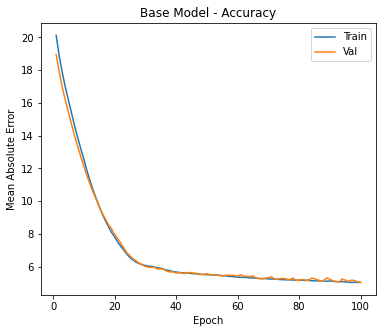

In [ ]:
#Nilai Dasar NumHiddenLayer = 1
#Nilai Dasar NumHiddenNeuronPerLayer = [128, ]
#Nilai Dasar ActivationFuncPerLayer = ['sigmoid', 'relu']

BATCH_SIZE = 50
EPOCHS = 100
Label_Epochs = []
for i in range(EPOCHS):
  Label_Epochs.append(i+1)

NumHiddenLayer = 1
NumHiddenNeuronPerLayer = [128]
ActivationFuncPerLayer = ['sigmoid','relu']

opt = RMSprop(learning_rate=0.001)

model_percobaan1 = build_ann_model(NumHiddenLayer, NumHiddenNeuronPerLayer, ActivationFuncPerLayer)
model_percobaan1.build((None, 13))
model_percobaan1.compile(optimizer=opt, loss='mean_absolute_error', metrics=['mean_absolute_error'])
model_percobaan1.summary()
History_Base_Training = model_percobaan1.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=BATCH_SIZE, epochs=EPOCHS)

# Ploting Hasil Penggunaan dari Kullback-Leibler Divergence Function
plt.rcParams['figure.figsize'] = (6.0, 5.0)
plt.plot(Label_Epochs, History_Base_Training.history['mean_absolute_error'])
plt.plot(Label_Epochs, History_Base_Training.history['val_mean_absolute_error'])
plt.title('Base Model - Accuracy')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['Train', 'Val'])
plt.savefig('BaseModel-Accuracy.jpg')
plt.show()

## **Tahapan 5**.
Percobaan ke-2 dilakukan untuk mencari jumlah hidden layer terbaik (1-5 hidden layer) dalam regression model dengan tahapan dimana setiap hidden layer memiliki 128 neuron dan menggunaan fungsi aktifasi Sigmoid

In [ ]:
#Nilai Pencarian NumHiddenLayer = 1, 2, 3, 4, 5
#Nilai Dasar NumHiddenNeuronPerLayer = [128, ..., 128]
#Nilai Dasar ActivationFuncPerLayer = ['sigmoid', ..., 'sigmoid', 'relu']

BATCH_SIZE = 50
EPOCHS = 80
opt = RMSprop(learning_rate=0.001)
History_NumHiddenLayer_Training = []

for JumHiddenLayer in range(5) :
  NumHiddenLayer = JumHiddenLayer+1 # Karena looping JumHiddenLayer dimulai dari 0  

  # Pendefinisian Jumlah Hidden Neuron pada Setiap Layer dengan 128
  NumHiddenNeuronPerLayer = []
  for idx in range(NumHiddenLayer) :
    NumHiddenNeuronPerLayer.append(128)

  # Pendefinisian Fungsi Aktifasi Sigmoid di Hidden Layer dan Relu pada Output Layer
  ActivationFuncPerLayer = []
  for idx in range(NumHiddenLayer) :
    ActivationFuncPerLayer.append('sigmoid')
  ActivationFuncPerLayer.append('relu')

  model_percobaan2 = build_ann_model(NumHiddenLayer, NumHiddenNeuronPerLayer, ActivationFuncPerLayer)
  model_percobaan2.build((None, 13))
  model_percobaan2.compile(optimizer=opt, loss='mean_absolute_error', metrics=['mean_absolute_error'])
  model_percobaan2.summary()
  Temp_Hasil = model_percobaan2.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=BATCH_SIZE, epochs=EPOCHS)
  History_NumHiddenLayer_Training.append(Temp_Hasil)

Model: "sequential_20"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_20 (Flatten)        (None, 13)                0         
                                                                 
 dense_80 (Dense)            (None, 128)               1792      
                                                                 
 dense_81 (Dense)            (None, 1)                 129       
                                                                 
Total params: 1,921
Trainable params: 1,921
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
8/8 [==============================] - 1s 22ms/step - loss: 21.7202 - mean_absolute_error: 21.7202 - val_loss: 21.2723 - val_mean_absolute_error: 21.2723
Epoch 2/80
8/8 [==============================] - 0s 6ms/step - loss: 19.7992 - mean_absolute_error: 19.7992 - val_loss: 19.6468 - val_mean_absolute_e

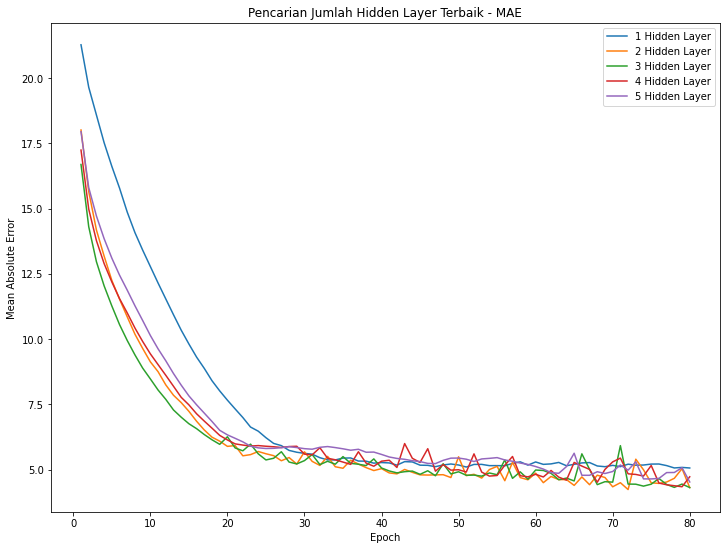

In [ ]:
# Visualisasi Hasil Pembentukan Model terhadap Kinerja pada Validation Data
Label_Epochs = []
for i in range(EPOCHS):
  Label_Epochs.append(i+1)

plt.rcParams['figure.figsize'] = (12.0, 9.0)
for idx in range(5) :
  plt.plot(Label_Epochs, History_NumHiddenLayer_Training[idx].history['val_mean_absolute_error'])
plt.title('Pencarian Jumlah Hidden Layer Terbaik - MAE')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['1 Hidden Layer', '2 Hidden Layer', '3 Hidden Layer', '4 Hidden Layer', '5 Hidden Layer'])
plt.savefig('PencarianJumlahHiddenLayerTerbaik-MAE.jpg')
plt.show()

## **Tahapan 5**.
Percobaan ke-3 dilakukan untuk mencari jumlah hidden neuron terbaik dari setiap Hidden Layer (16, 32, 64, 128, 256) dalam regression model. Acuan yang digunakan adalah penggunaan jumlah hidden layer terbaik (dari percobaan ke-2) sebanyak 2-3 hidden layer. Sehingga pada percobaan ke-3 ini akan dilakukan terlebih dahulu eksplorasi kombinasi jumlah hidden neuron pada penggunaan 2 hidden layer dalam arsitektur ANN yang didefinisikan. Masing-masing hidden layer masih menggunakan fungsi aktifasi Sigmoid.

In [16]:
#Nilai Terbaik NumHiddenLayer = 2
#Nilai Pencarian NumHiddenNeuronPerLayer = 16 | 32 | 64 | 128 | 256
#Nilai Dasar ActivationFuncPerLayer = ['sigmoid', 'sigmoid', 'relu']

BATCH_SIZE = 50
EPOCHS = 80
opt = RMSprop(learning_rate=0.001)
NumHiddenLayer = 2
ActivationFuncPerLayer = ['sigmoid', 'sigmoid', 'relu']
data_val_error = []

Var_NumHiddenNeuron = [16, 32, 64, 128, 256]

for NumNeuronLayer1 in Var_NumHiddenNeuron :
  data_val_error_perlayer1 = []
  for NumNeuronLayer2 in Var_NumHiddenNeuron :
    NumHiddenNeuronPerLayer = [NumNeuronLayer1, NumNeuronLayer2]
    model_percobaan3 = build_ann_model(NumHiddenLayer, NumHiddenNeuronPerLayer, ActivationFuncPerLayer)
    model_percobaan3.build((None, 13))
    model_percobaan3.compile(optimizer=opt, loss='mean_absolute_error', metrics=['mean_absolute_error'])
    model_percobaan3.summary()
    model_percobaan3.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)
    loss_val, acc_val = model_percobaan3.evaluate(x_valid, y_valid)
    data_val_error_perlayer1.append(loss_val)
  
  # Memasukkan data validation error (MAE) ke array penyimpanan error keseluruhan untuk setiap setting nilai pada Hidden Layer ke-1
  data_val_error.append(data_val_error_perlayer1)

dframe_val_error = pd.DataFrame(data_val_error, index =['16', '32', '64', '128', '256'], columns =['16', '32', '64', '128', '256'])
print(dframe_val_error)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 13)                0         
                                                                 
 dense (Dense)               (None, 16)                224       
                                                                 
 dense_1 (Dense)             (None, 16)                272       
                                                                 
 dense_2 (Dense)             (None, 1)                 17        
                                                                 
Total params: 513
Trainable params: 513
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
8/8 [==============================] - 1s 3ms/step - loss: 21.0796 - mean_absolute_error: 21.0796
Epoch 2/80
8/8 [==============================] - 0s 2ms/step - loss: 20.8236 - m

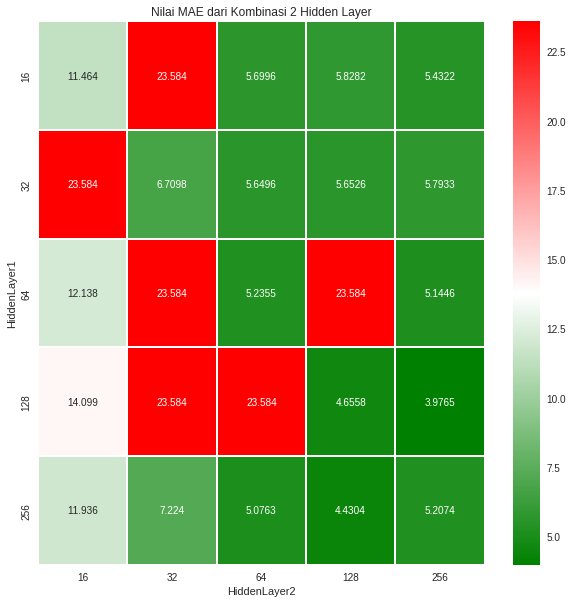

In [25]:
# Melakukan ploting nilai MAE dari beberapa kombinasi jumlah neuron hidden pada 2 hidden layer di Heatmap
plt.style.use("seaborn") 
plt.figure(figsize=(10,10))
warna_heatmap = LinearSegmentedColormap.from_list('gr',["g", "w", "r"], N=256)
heat_map = sns.heatmap(dframe_val_error, linewidth = 1 , annot = True, fmt='.5g', cmap=warna_heatmap)
heat_map.set(xlabel='HiddenLayer2', ylabel='HiddenLayer1')
plt.title( "Nilai MAE dari Kombinasi 2 Hidden Layer" )
plt.show()

## **Tahapan 6**.
Percobaan ke-4 melanjutkan proses pencarian komposisi jumlah hidden neuron pada setiap hidden layer, namun pada percobaan ini akan dipertimbangkan jumlah hidden layer sejumlah 3. Percobaan pencarian jumlah hidden neuron masih dengan lingkup pencarian yang sama (16, 32, 64, 128, 256) dan penggunaan Sigmoid Activation Function di setiap hidden layer.

In [31]:
#Nilai Terbaik NumHiddenLayer = 3
#Nilai Pencarian NumHiddenNeuronPerLayer = 16 | 32 | 64 | 128 | 256
#Nilai Dasar ActivationFuncPerLayer = ['sigmoid', 'sigmoid', 'sigmoid', 'relu']

BATCH_SIZE = 50
EPOCHS = 80
opt = RMSprop(learning_rate=0.001)
NumHiddenLayer = 3
ActivationFuncPerLayer = ['sigmoid', 'sigmoid', 'sigmoid', 'relu']
data_val_error4 = []

Var_NumHiddenNeuron = [16, 32, 64, 128, 256]

for NumNeuronLayer1 in Var_NumHiddenNeuron :
  data_val_error_perlayer1 = []
  for NumNeuronLayer2 in Var_NumHiddenNeuron :
    for NumNeuronLayer3 in Var_NumHiddenNeuron :
      NumHiddenNeuronPerLayer = [NumNeuronLayer1, NumNeuronLayer2, NumNeuronLayer3]
      model_percobaan4 = build_ann_model(NumHiddenLayer, NumHiddenNeuronPerLayer, ActivationFuncPerLayer)
      model_percobaan4.build((None, 13))
      model_percobaan4.compile(optimizer=opt, loss='mean_absolute_error', metrics=['mean_absolute_error'])
      model_percobaan4.summary()
      model_percobaan4.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)
      loss_val, acc_val = model_percobaan4.evaluate(x_valid, y_valid)
      data_val_error_perlayer1.append(loss_val)
  
  # Memasukkan data validation error (MAE) ke array penyimpanan error keseluruhan untuk setiap setting nilai pada Hidden Layer ke-1
  data_val_error4.append(data_val_error_perlayer1)

label_columns = []
for label1 in Var_NumHiddenNeuron:
  for label2 in Var_NumHiddenNeuron:
    label_columns.append(str(label1)+" - "+str(label2))

dframe_val_error4 = pd.DataFrame(data_val_error4, index = ['16', '32', '64', '128', '256'], columns = label_columns)
print(dframe_val_error4)

Streaming output truncated to the last 5000 lines.
Epoch 26/80
8/8 [==============================] - 0s 6ms/step - loss: 22.3992 - mean_absolute_error: 22.3992
Epoch 27/80
8/8 [==============================] - 0s 6ms/step - loss: 22.3992 - mean_absolute_error: 22.3992
Epoch 28/80
8/8 [==============================] - 0s 6ms/step - loss: 22.3992 - mean_absolute_error: 22.3992
Epoch 29/80
8/8 [==============================] - 0s 7ms/step - loss: 22.3992 - mean_absolute_error: 22.3992
Epoch 30/80
8/8 [==============================] - 0s 6ms/step - loss: 22.3992 - mean_absolute_error: 22.3992
Epoch 31/80
8/8 [==============================] - 0s 7ms/step - loss: 22.3992 - mean_absolute_error: 22.3992
Epoch 32/80
8/8 [==============================] - 0s 6ms/step - loss: 22.3992 - mean_absolute_error: 22.3992
Epoch 33/80
8/8 [==============================] - 0s 6ms/step - loss: 22.3992 - mean_absolute_error: 22.3992
Epoch 34/80
8/8 [==============================] - 0s 5ms/step - loss

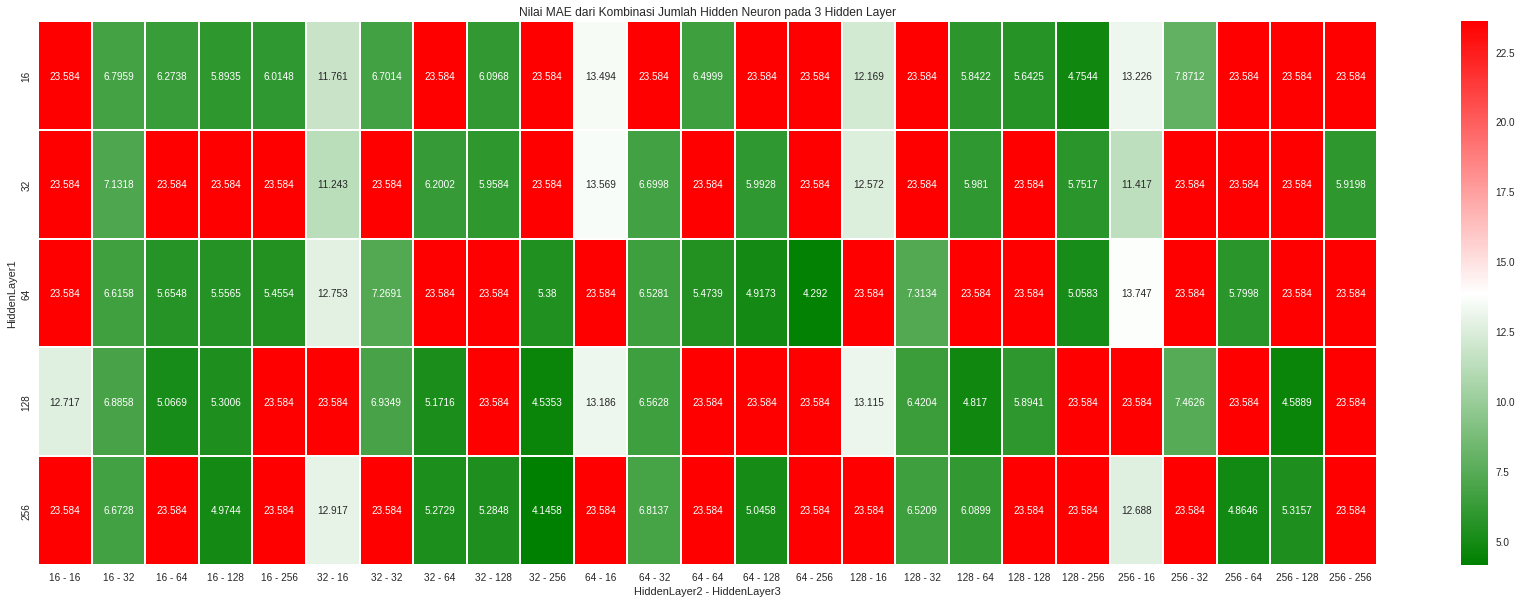

In [33]:
# Melakukan ploting nilai MAE dari beberapa kombinasi jumlah neuron hidden pada 3 hidden layer di Heatmap
plt.style.use("seaborn") 
plt.figure(figsize=(30,10))
warna_heatmap = LinearSegmentedColormap.from_list('gr',["g", "w", "r"], N=256)
heat_map = sns.heatmap(dframe_val_error4, linewidth = 1 , annot = True, fmt='.5g', cmap=warna_heatmap)
heat_map.set(xlabel='HiddenLayer2 - HiddenLayer3', ylabel='HiddenLayer1')
plt.title( "Nilai MAE dari Kombinasi Jumlah Hidden Neuron pada 3 Hidden Layer" )
plt.show()

## **Tahapan 7**.
Percobaan ke-5 dilakukan untuk mencari kombinasi activation function pada setiap layer pada 2 hidden layer yang didefinisikan. Percobaan pencarian activation function dilakukan dengan kombinasi berikut linear, relu, sigmoid, tanh, dan softsign. Pencarian dengan mempertimbangkan arsitektur ANN yang telah diperoleh sebelumnya, yaitu dengan 2 hidden layer serta jumlah neuron 128 dan 256.

In [5]:
#Nilai Terbaik NumHiddenLayer = 2
#Nilai Terbaik NumHiddenNeuronPerLayer = 128 dan 256
#Nilai Pencarian ActivationFuncPerLayer = linear, relu, sigmoid, tanh, dan softsign

BATCH_SIZE = 50
EPOCHS = 80
opt = RMSprop(learning_rate=0.001)
NumHiddenLayer = 2
NumHiddenNeuronPerLayer = [128, 256]
data_val_error5 = []

Var_ActivationFunc = ['linear', 'relu', 'sigmoid', 'tanh', 'softsign']

for ActFuncLayer1 in Var_ActivationFunc :
  data_val_error_perlayer1 = []
  for ActFuncLayer2 in Var_ActivationFunc :
    ActivationFuncPerLayer = [ActFuncLayer1, ActFuncLayer2, 'relu']
    model_percobaan5 = build_ann_model(NumHiddenLayer, NumHiddenNeuronPerLayer, ActivationFuncPerLayer)
    model_percobaan5.build((None, 13))
    model_percobaan5.compile(optimizer=opt, loss='mean_absolute_error', metrics=['mean_absolute_error'])
    model_percobaan5.summary()
    model_percobaan5.fit(x_train, y_train, batch_size=BATCH_SIZE, epochs=EPOCHS)
    loss_val, acc_val = model_percobaan5.evaluate(x_valid, y_valid)
    data_val_error_perlayer1.append(loss_val)
  
  # Memasukkan data validation error (MAE) ke array penyimpanan error keseluruhan untuk setiap setting nilai pada Hidden Layer ke-1
  data_val_error5.append(data_val_error_perlayer1)

dframe_val_error5 = pd.DataFrame(data_val_error5, index = Var_ActivationFunc, columns = Var_ActivationFunc)
print(dframe_val_error5)

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_1 (Flatten)         (None, 13)                0         
                                                                 
 dense_2 (Dense)             (None, 128)               1792      
                                                                 
 dense_3 (Dense)             (None, 256)               33024     
                                                                 
 dense_4 (Dense)             (None, 1)                 257       
                                                                 
Total params: 35,073
Trainable params: 35,073
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
8/8 [==============================] - 1s 3ms/step - loss: 21.2562 - mean_absolute_error: 21.2562
Epoch 2/80
8/8 [==============================] - 0s 3ms/step - loss: 22.

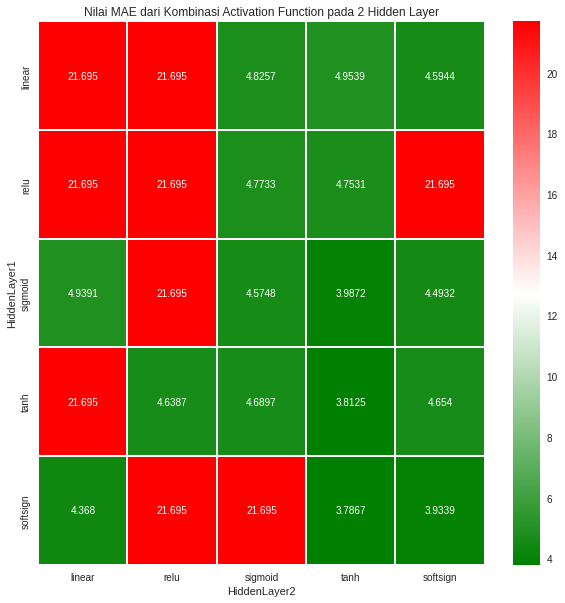

In [7]:
# Melakukan ploting nilai MAE dari beberapa kombinasi activation function pada 2 hidden layer di Heatmap
plt.style.use("seaborn") 
plt.figure(figsize=(10,10))
warna_heatmap = LinearSegmentedColormap.from_list('gr',["g", "w", "r"], N=256)
heat_map = sns.heatmap(dframe_val_error5, linewidth = 1 , annot = True, fmt='.5g', cmap=warna_heatmap)
heat_map.set(xlabel='HiddenLayer2', ylabel='HiddenLayer1')
plt.title( "Nilai MAE dari Kombinasi Activation Function pada 2 Hidden Layer" )
plt.show()

## **Tahapan 8**.
Percobaan ke-6 dilakukan untuk mencari fungsi optimizer dari beberapa optimizer yang ada yaitu RMSProp, Adadelta, Adagrad, SGD+Momentum, Adam, Adamax, dan Nadam. Pencarian dengan mempertimbangkan arsitektur ANN yang telah diperoleh sebelumnya, yaitu dengan 2 hidden layer, jumlah neuron 128 dan 256, serta fungsi aktifasi softsign dan tanh.

In [19]:
#Nilai Terbaik NumHiddenLayer = 2
#Nilai Terbaik NumHiddenNeuronPerLayer = 128 dan 256
#Nilai Terbaik ActivationFuncPerLayer = softsign dan tanh

BATCH_SIZE = 50
EPOCHS = 80
NumHiddenLayer = 2
NumHiddenNeuronPerLayer = [128, 256]
ActivationFuncPerLayer = ['softsign', 'tanh', 'relu']
history_optimizer_training = []

opt = []
opt.append(RMSprop(learning_rate=0.001))
opt.append(Adadelta(learning_rate=0.001))
opt.append(Adagrad(learning_rate=0.001))
opt.append(SGD(learning_rate=0.001, momentum=0.5))
opt.append(Adam(learning_rate=0.001))
opt.append(Adamax(learning_rate=0.001))
opt.append(Nadam(learning_rate=0.001))

for idx in range(len(opt)) :
  model_percobaan6 = build_ann_model(NumHiddenLayer, NumHiddenNeuronPerLayer, ActivationFuncPerLayer)
  model_percobaan6.build((None, 13))
  model_percobaan6.compile(optimizer=opt[idx], loss='mean_absolute_error', metrics=['mean_absolute_error'])
  model_percobaan6.summary()
  temp_training = model_percobaan6.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=BATCH_SIZE, epochs=EPOCHS)
  history_optimizer_training.append(temp_training)

Model: "sequential_90"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_90 (Flatten)        (None, 13)                0         
                                                                 
 dense_269 (Dense)           (None, 128)               1792      
                                                                 
 dense_270 (Dense)           (None, 256)               33024     
                                                                 
 dense_271 (Dense)           (None, 1)                 257       
                                                                 
Total params: 35,073
Trainable params: 35,073
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
8/8 [==============================] - 1s 25ms/step - loss: 12.6743 - mean_absolute_error: 12.6743 - val_loss: 6.4581 - val_mean_absolute_error: 6.4581
Epoch 2/80
8/8 [==

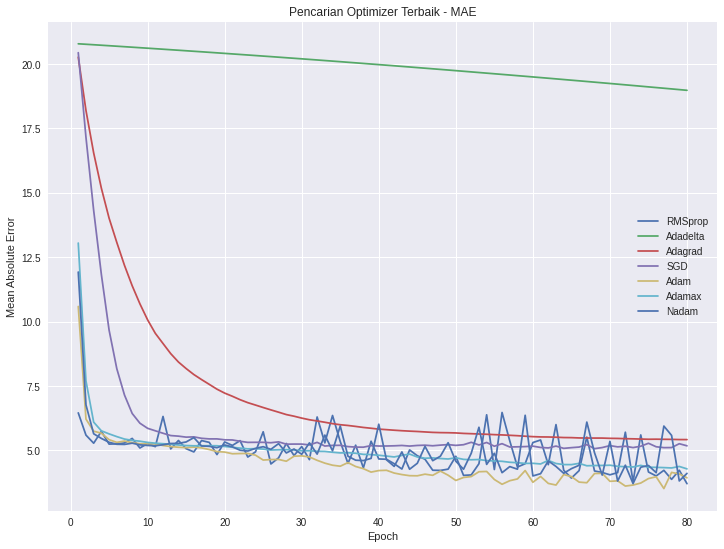

In [20]:
# Visualisasi Hasil Pembentukan Model terhadap Kinerja pada Validation Data
Label_Epochs = []
for i in range(EPOCHS):
  Label_Epochs.append(i+1)

plt.rcParams['figure.figsize'] = (12.0, 9.0)
for idx in range(len(opt)) :
  plt.plot(Label_Epochs, history_optimizer_training[idx].history['val_mean_absolute_error'])
plt.title('Pencarian Optimizer Terbaik - MAE')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(['RMSprop', 'Adadelta', 'Adagrad', 'SGD', 'Adam', 'Adamax', 'Nadam'])
plt.savefig('PencarianOptimizerTerbaik-MAE.jpg')
plt.show()

## **Tahapan 9**.
Percobaan ke-7 dilakukan untuk mencari Loss Function dari beberapa fungsi loss yang tersedia, yaitu mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, mean_squared_logarithmic_error, dan cosine_similarity. Pencarian dengan mempertimbangkan arsitektur ANN yang telah diperoleh sebelumnya, yaitu dengan 2 hidden layer, jumlah neuron 128 dan 256, serta fungsi aktifasi softsign dan tanh. Selain itu juga digunakan dalam proses training dengan optimizer Adam dan Metric pengukuran yang sama yaitu Mean Absolute Error

In [26]:
#Nilai Terbaik NumHiddenLayer = 2
#Nilai Terbaik NumHiddenNeuronPerLayer = 128 dan 256
#Nilai Terbaik ActivationFuncPerLayer = softsign dan tanh

BATCH_SIZE = 50
EPOCHS = 80
NumHiddenLayer = 2
NumHiddenNeuronPerLayer = [128, 256]
ActivationFuncPerLayer = ['softsign', 'tanh', 'relu']

opt = Adam(learning_rate=0.001)
history_loss_training = []
loss_func = ['mean_squared_error','mean_absolute_error','mean_absolute_percentage_error','mean_squared_logarithmic_error','cosine_similarity']

for idx in range(len(loss_func)) :
  model_percobaan7 = build_ann_model(NumHiddenLayer, NumHiddenNeuronPerLayer, ActivationFuncPerLayer)
  model_percobaan7.build((None, 13))
  model_percobaan7.compile(optimizer=opt, loss=loss_func[idx], metrics=['mean_absolute_error'])
  model_percobaan7.summary()
  temp_training = model_percobaan7.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=BATCH_SIZE, epochs=EPOCHS)
  history_loss_training.append(temp_training)

Model: "sequential_107"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_107 (Flatten)       (None, 13)                0         
                                                                 
 dense_320 (Dense)           (None, 128)               1792      
                                                                 
 dense_321 (Dense)           (None, 256)               33024     
                                                                 
 dense_322 (Dense)           (None, 1)                 257       
                                                                 
Total params: 35,073
Trainable params: 35,073
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
8/8 [==============================] - 1s 27ms/step - loss: 405.1177 - mean_absolute_error: 17.7752 - val_loss: 194.7828 - val_mean_absolute_error: 11.3902
Epoch 2/80
8/

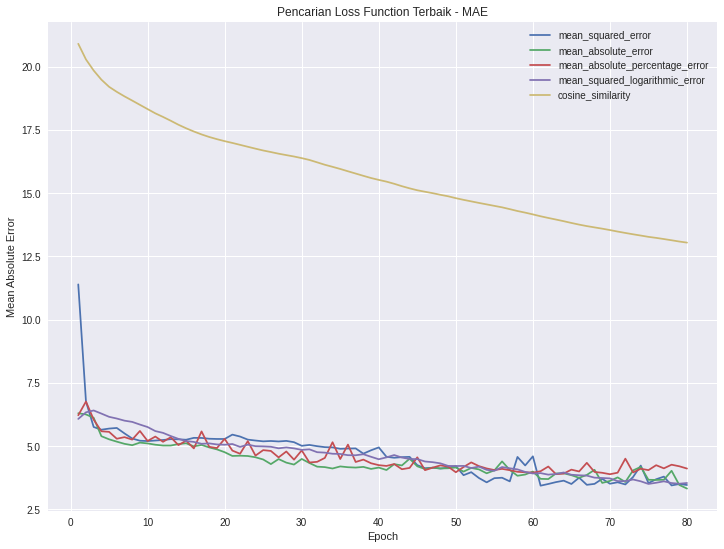

In [27]:
# Visualisasi Hasil Pembentukan Model terhadap Kinerja pada Validation Data
Label_Epochs = []
for i in range(EPOCHS):
  Label_Epochs.append(i+1)

plt.rcParams['figure.figsize'] = (12.0, 9.0)
for idx in range(len(loss_func)) :
  plt.plot(Label_Epochs, history_loss_training[idx].history['val_mean_absolute_error'])
plt.title('Pencarian Loss Function Terbaik - MAE')
plt.ylabel('Mean Absolute Error')
plt.xlabel('Epoch')
plt.legend(loss_func)
plt.savefig('PencarianLossFunctionTerbaik-MAE.jpg')
plt.show()

## **Tahapan 10**.
Melakukan proses learning dengan arsitektur dan skema pembelajaran seperti pengaturan sebagai berikut:
1.   Jumlah Epoch adalah 80
2.   Ukuran Batch adalah 50
3.   Jumlah Hidden Layer adalah 2
4.   Kombinasi Jumlah Hidden Neuron adalah 128 di Layer 1 dan 256 di Layer 2
5.   Kombinasi Fungsi Aktifitasi adalah Softsign di Hidden Layer 1, Tanh di Hidden Layer 2, dan Relu di Output Layer
6.   Fungsi Optimizer adalah Adam
6.   Fungsi Loss adalah Mean Squared Error
6.   Nilai Learning Rate adalah 0,001



In [30]:
# Pendefinisian beberapa variabel untuk proses penyimpanan model ke Google Drive
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [33]:
BATCH_SIZE = 50
EPOCHS = 80
NumHiddenLayer = 2
NumHiddenNeuronPerLayer = [128, 256]
ActivationFuncPerLayer = ['softsign', 'tanh', 'relu']
opt = Adam(learning_rate=0.001)
loss_func = 'mean_squared_error'

model_final = build_ann_model(NumHiddenLayer, NumHiddenNeuronPerLayer, ActivationFuncPerLayer)
model_final.build((None, 13))
model_final.compile(optimizer=opt, loss=loss_func, metrics=['mean_absolute_error'])
model_final.summary()
model_final.fit(x_train, y_train, validation_data=(x_valid, y_valid), batch_size=BATCH_SIZE, epochs=EPOCHS)

Model: "sequential_114"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_114 (Flatten)       (None, 13)                0         
                                                                 
 dense_341 (Dense)           (None, 128)               1792      
                                                                 
 dense_342 (Dense)           (None, 256)               33024     
                                                                 
 dense_343 (Dense)           (None, 1)                 257       
                                                                 
Total params: 35,073
Trainable params: 35,073
Non-trainable params: 0
_________________________________________________________________
Epoch 1/80
8/8 [==============================] - 1s 26ms/step - loss: 480.2362 - mean_absolute_error: 19.5281 - val_loss: 251.5535 - val_mean_absolute_error: 13.1637
Epoch 2/80
8/

In [34]:
# Proses menyimpan model ke Google Drive yang telah disiapkan lokasi foldernya
model_final.save("Model/Best_ANN.h5")

gfile = drive.CreateFile({'parents': [{'id': '1i3vnskMl89eU8i7XBmLZgtKuQYDla4Te'}], 'title': 'Best_ANN.h5'})
gfile.SetContentFile('Model/Best_ANN.h5')
gfile.Upload()

## **Tahapan 11**.
Merupakan tahapan terakhir yaitu memuat model yang telah tersimpan dan mengujinya ke testing data.